In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import sklearn


In [2]:
print(cv2.__version__)
print(np.__version__)
print(sklearn.__version__)

3.4.2
1.20.3
0.24.2


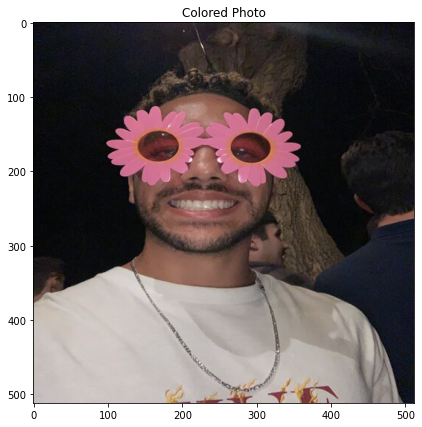

In [3]:
png = cv2.imread('Additional photo.jpg') # <---------


    #    
    # to IMPORT the second photo please change 'baboon.png' to 'Additional photo.jpg'
    #
    
    
fig = plt.figure(figsize=(10,7))
rows = 1
columns = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(png,cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.title ("Colored Photo")

def thresh(x):
    global colorThresh
    colorThresh = x
    
#arbitrary color
thresh(0) # Replace 0 with any number you would like to set for the threshold value.
        # However the slide bar will hold the value but not display the values position from 0-255

In [4]:
def floodFill(img, Coordinates, Picvalue, threshold):
   
    #initializations
    Bint = Picvalue[0]
    Gint = Picvalue[1]
    Rint = Picvalue[2]
    
    rows, cols, bgr = img.shape
    stack = []
    stack.append(Coordinates)
    
    mask = [(-1,0),(1,0),(0,-1),(0,1),(-1,-1),(-1,1),(1,-1),(1,1)] #eight neighbouring pixels mask
    
    while(len(stack) > 0):
        seed = stack.pop()
        
        #for each quadrant
        
        for i in range(len(mask)):
            
            #adds the mask to seed point to retrieve eight quadrants of adjacent pixels
            
            x = seed[0] + mask[i][0]
            y = seed[1] + mask[i][1]
            
            #Boundary Check
            if((x >= 0) and (y >= 0) and (x < cols) and (y < rows)):
                
                #Taking the absolute value of pixel colour to avoid negative values
                
                Bcomp = abs((255-Bint)-(255-img[y,x,0]))
                Gcomp = abs((255-Gint)-(255-img[y,x,1]))
                Rcomp = abs((255-Rint)-(255-img[y,x,2]))
                
                #check Colour values to see if pixels are within the intensity threshold
                
                if((Bcomp < threshold) and (Gcomp < threshold) and (Rcomp < threshold)):
                    
                    #add neighbourhood pixels to stack
                    stack.append((x, y))
                    img[y, x] = (224, 49, 143)
                    
    return

In [5]:
def MouseClick(mouse, coor_x, coor_y, flags, param):
    global mouseX,mouseY
    if mouse == cv2.EVENT_LBUTTONDOWN:
        mouseX,mouseY = coor_x,coor_y
        ChannelValue = png[mouseY,mouseX]
        print("Threshold Value: ", colorThresh)
        floodFill(png, (mouseX, mouseY), ChannelValue, colorThresh)
        print("Pixels Filled around: (X =",mouseX,"), (Y =",mouseY,")")
        cv2.imshow("Region Growing",png)
       

In [6]:
#display
cv2.namedWindow("Region Growing")
cv2.resizeWindow("Region Growing", png.shape[1], png.shape[0])
cv2.setMouseCallback("Region Growing", MouseClick)
cv2.createTrackbar("Threshold","Region Growing",0,255,thresh)


In [7]:
#show
cv2.imshow("Region Growing",png)
cv2.waitKey(0)
cv2.destroyAllWindows()
exit()

Threshold Value:  46
Pixels Filled around: (X = 223 ), (Y = 244 )
Threshold Value:  46
Pixels Filled around: (X = 252 ), (Y = 159 )
Threshold Value:  46
Pixels Filled around: (X = 127 ), (Y = 422 )
Threshold Value:  46
Pixels Filled around: (X = 371 ), (Y = 269 )


Hi TA team,

8-connectivity was the type of neighbourhood connectivity applied. 
8-connectivity substantially increased the accuracy and fill percentage of the function.

The Homogeneity criterion: maximum allowed absolute difference between the seed pixel and neighbouring pixels with the mask applied. 
If absolute difference of the compared colours is less then the threshold. Fill and visit that pixel value. 

Please refer to the For loop inside of Floodfill to see it applied.

Please see the THIRD Cell for Photo import instructions.

Thanks!

Tristan